In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
k1 = 10
k2 = 1
a = 0
b = 0.5
c = 1
ua = 0
uc = 1
f = 1

In [3]:
h = 0.01
n = int((c - a) / h)
m = int((b-a)/c * n)-1

In [4]:
def mat_f(i, j):
    if i == m:
        if i == j:
            return k1 + k2
        if j == i-1:
            return -k1
        if j == i+1:
            return -k2
    if i < m:
        cons = k1
    elif i > m:
        cons = k2
    
        
    if i == j:
        return 2*cons
    elif j == i-1 or j == i+1:
        return -cons
    else:
        return 0

In [5]:
M = np.fromfunction(np.vectorize(mat_f), (n-1, n-1))
M *= 1/(h**2)

In [6]:
y = f * np.ones(n-1)
y[0] += k1 * 1/(h**2) * ua
y[n-2] += k2 * 1/(h**2) * uc

In [7]:
x = np.dot(np.linalg.inv(M),y)
u = np.hstack((np.array([ua]), x, np.array([uc])))

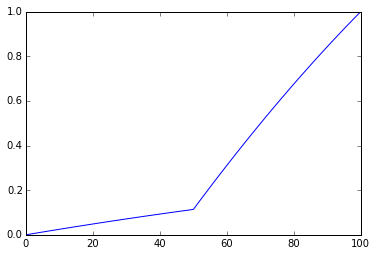

In [8]:
plt.plot(u)
plt.show()

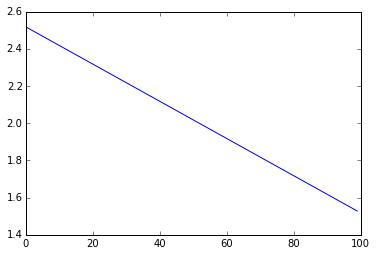

In [9]:
koef1 = k1 * np.ones(m+1)
koef2 = k2 * np.ones(n-m-1)
koeff = np.hstack([koef1, koef2])
udot = np.diff(u)/h
plt.plot(udot*koeff)
plt.show()